In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [0]:
import numpy as np
import pandas as pd
from torch.utils.data.dataset import Dataset


label_idx = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}


class IrisDataset(Dataset):

    def __init__(self, data):
        self.data = data
           
    def __getitem__(self, index):
        item = self.data.iloc[index].values
        return (item[0:4].astype(np.float32), item[4].astype(np.int))

    def __len__(self):
        return self.data.shape[0]

In [180]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

def get_datasets(iris_file, train_ratio=0.80):

    labels = {'class': label_idx}
    data = pd.read_csv(iris_file)
    data.replace(labels, inplace=True)

    train_df = data.sample(frac=train_ratio, random_state=3)
    test_df = data.loc[~data.index.isin(train_df.index), :]

    return IrisDataset(train_df), IrisDataset(test_df)

Mounted at /content/gdrive


In [0]:
iris_file='/content/gdrive/My Drive/iris/iris.data.txt'

trainds,testds=get_datasets(iris_file)


In [182]:
trainds.data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
47,4.6,3.2,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
31,5.4,3.4,1.5,0.4,0
25,5.0,3.0,1.6,0.2,0
15,5.7,4.4,1.5,0.4,0
118,7.7,2.6,6.9,2.3,2
89,5.5,2.5,4.0,1.3,1
6,4.6,3.4,1.4,0.3,0
103,6.3,2.9,5.6,1.8,2
65,6.7,3.1,4.4,1.4,1


In [0]:
class Irisnet(nn.Module):
  
  def __init__(self,isize,hid1,hid2,nclass):
    
    super(Irisnet,self).__init__()
    #self.hid1 = hid1 
    self.fc1=nn.Linear(isize,hid1)
    self.relu1=nn.ReLU()
    self.fc2=nn.Linear(hid1,hid2)
    self.relu2=nn.ReLU()
    self.fc3=nn.Linear(hid2,nclass)
   
  def forward(self,x):
    #in2 = isize + self.hid1 
    o=self.fc1(x)
    o=self.relu1(o)
    o=self.fc2(o)
    o=self.relu2(o)
    o=self.fc3(o)
    #o=self.softmax(o)
    return o

In [184]:
model=Irisnet(4,100,50,3)
print(model)

Irisnet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


In [0]:
#their way
from torch.utils.data import DataLoader
trainloader=torch.utils.data.DataLoader(dataset=trainds,batch_size=20,shuffle=True)
testloader=torch.utils.data.DataLoader(dataset=testds,batch_size=10,shuffle=True)

In [186]:
print('# instances in training set: ', len(trainds))
print('# instances in testing/validation set: ', len(testds))
#import torch.nn.functional as F

# instances in training set:  120
# instances in testing/validation set:  30


In [0]:
model = Irisnet(4, 100, 50, 3)
learning_rate=0.001
criteria=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate,nesterov=True,momentum=0.9,dampening=0)



In [188]:
num_epochs=1000
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(num_epochs):
  
  train_correct=0
  train_total=0
  for i, (databatch,clas) in enumerate(trainloader):
    
    
    databatch=Variable(databatch, requires_grad = True)
    clas=Variable(clas)
    #print(clas)
    model.train()
    print("clas ",clas)
    optimizer.zero_grad()
    op=model(databatch)
    _, predicted = torch.max(op.data, 1)
    print("predicted ",predicted)
    loss=criteria(op ,clas)
    loss.backward()
    optimizer.step()
    #print(op)
    train_total += clas.size(0) 
    #print(predicted)
    train_correct += (predicted == clas.data).sum()

    print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, len(trainds)//batch_size, loss.data[0]))
    
  model.eval()                 # Put the network into evaluation mode
    
    # Book keeping
    # Record the loss
  train_loss.append(loss.data[0])

    # What was our train accuracy?
  train_accuracy.append((100 * train_correct / train_total))
    
    # How did we do on the test set (the unseen set)
    # Record the correct predictions for test data
  test_items = torch.FloatTensor(testds.data.values[:, 0:4])
  test_classes = torch.LongTensor(testds.data.values[:, 4])

  outputs = model(Variable(test_items))
  loss = criteria(outputs, Variable(test_classes))
  test_loss.append(loss.data[0])
  _, predicted = torch.max(outputs.data, 1)
  total = test_classes.size(0)
  print(predicted,test_classes)
  correct = (predicted == test_classes).sum()
  test_accuracy.append((100 * correct / total))
  print((100 * correct / total))

clas  tensor([1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1])
predicted  tensor([0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0])
Epoch 1/1000, Iteration 1/2, Loss: 1.1403
clas  tensor([1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 2])
predicted  tensor([0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2])
Epoch 1/1000, Iteration 2/2, Loss: 1.0671
clas  tensor([0, 1, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2])
predicted  tensor([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2])
Epoch 1/1000, Iteration 3/2, Loss: 1.0106
clas  tensor([2, 1, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1])
predicted  tensor([2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2])
Epoch 1/1000, Iteration 4/2, Loss: 1.0902
clas  tensor([2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0])
predicted  tensor([2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])
Epoch 1/1000, Iteration 5/2, Loss: 0.9700
clas  tensor([1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


clas  tensor([0, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1])
predicted  tensor([0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2])
Epoch 5/1000, Iteration 3/2, Loss: 0.8505
clas  tensor([2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0])
predicted  tensor([2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0])
Epoch 5/1000, Iteration 4/2, Loss: 0.8044
clas  tensor([2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1])
predicted  tensor([2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2])
Epoch 5/1000, Iteration 5/2, Loss: 0.8096
clas  tensor([2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0])
predicted  tensor([2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0])
Epoch 5/1000, Iteration 6/2, Loss: 0.8763
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2]

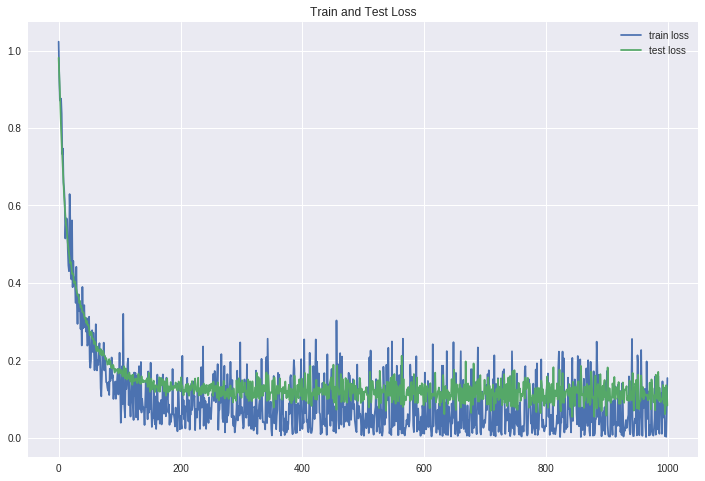

In [189]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.title("Train and Test Loss")
plt.legend()
plt.show()

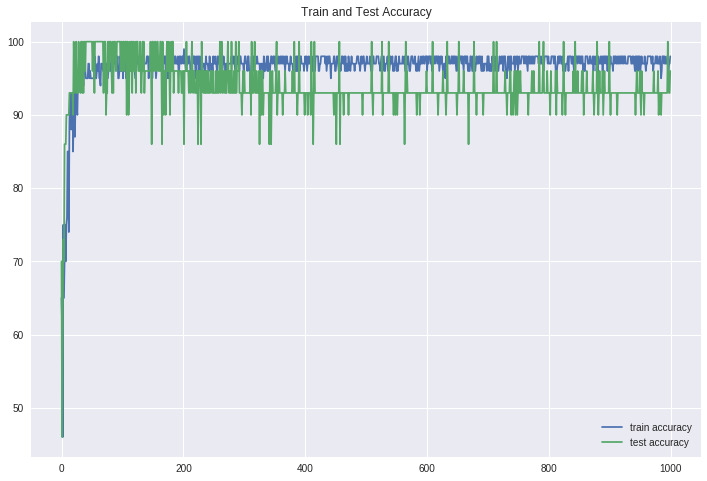

In [190]:
fig = plt.figure(figsize=(12, 8))
plt.plot(train_accuracy, label='train accuracy')
plt.plot(test_accuracy, label='test accuracy')
plt.title("Train and Test Accuracy")
plt.legend()
plt.show()